## Trump tweets sentiment analysis

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
consumer_key = 'Tk6xb0OkB5RP028w6syAGwpEP'
consumer_secret = 'mdC7cmpjEShS6RzKnREMQFmYnpMWrdXCaSfUCOsZMGxCM7fO0n'

access_token = '41552778-vmi4Nn4qX2B0x1e91kVv8Fx92FgeJNEp1Q2snynRb'
access_token_secret = 'GTejvjduTfb3htKcPv4sq5hSOoIg5fuMkmmaB0GT0LRzt'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

Now, we search tweets that contain the keyword 'Trump'.

In [3]:
public_tweets = api.search('#Trump', count = 100)

Print out a couple of the retreived tweets.

In [4]:
for i, tweet in enumerate(public_tweets):
    if i % 10 == 0:
        print(tweet.text)

RT @jameshaning: Donald #Trump is a stupid man's idea of a smart man, a poor man's idea of a rich man, and a weak man's idea of a strong ma…
RT @chuckwoolery: I am glad to hear that #Trump was outraged by #Sessions recusing himself. He was not for that. They say he went ballistic…
Cuando sientes que los tweets de Tu viejo se parecen demasiado a los de #Trump
RT @2ALAW: It Is Now Apparent That It Never Was The Russians Trying To "Fix" The Election -
It Was Barack Hussein Obama

#Trump 🇺🇸
#WireTap…
RT @Uncle_Jimbo: And he's still lying 

#Obama team never expected #Trump to win

Now their dirty tricks against @POTUS are coming out http…
RT @nia4_trump: James Clapper "can deny" a #Trump #wiretap to @chucktodd 🤔But, under oath Clapper LIED about the NSA internet spying progra…
RT @amjoyshow: Over 120 retired generals have signed a letter opposing #Trump's huge proposed cuts to the State Department #AMJoy https://t…
RT @PeterTownsend7: PC Logic' and #ISIS #muslim   #trump #isis #pjnet  http

Next, we try to analyze the tweets using TextBlob sentiment analysis method.

In [5]:
li = []

for tweet in public_tweets:
    internal_li = []
    internal_li.append(tweet.text)
    analyze = TextBlob(tweet.text)
    internal_li.append(analyze.sentiment.polarity)
    internal_li.append(analyze.sentiment.subjectivity)
    
    li.append(internal_li)
    
df = pd.DataFrame(li, columns= ['Tweet', 'Polarity', 'Subjectivity'])

Create a column that indicated whether or not a tweet has a negative sentiment or not (1 = negative, 0 = not negative).

In [6]:
df['Negative Sentiment'] = np.where(df['Polarity'] < 0, 'Negative Sentiment', 'Neutral/Positive Sentiment')
df.head()

,Tweet,Polarity,Subjectivity,Negative Sentiment
0,RT @jameshaning: Donald #Trump is a stupid man...,-0.092063,0.725198,Negative Sentiment
1,RT @Uncle_Jimbo: And he's still lying \n\n#Oba...,0.083333,0.533333,Neutral/Positive Sentiment
2,Those trying to blame #Trump for racist attack...,0.000000,0.000000,Neutral/Positive Sentiment
3,RT @DumpTrump22: How long will our government ...,-0.016667,0.233333,Negative Sentiment
4,RT @DrMartyFox: Muslim Who Sexually Assualted ...,0.300000,0.516667,Neutral/Positive Sentiment


Show prevalence of negative tweets.

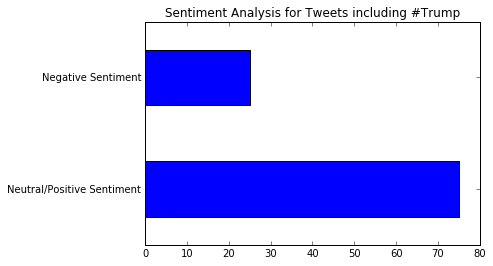

In [7]:
df['Negative Sentiment'].value_counts().plot(kind='barh', title='Sentiment Analysis for Tweets including #Trump')

TextBlob might not be as efficient for analyzing short tweets...